In [ ]:
from decimal import Decimal, getcontext
from sympy import *
getcontext().prec = 20
# from sympy.abc import x
x = Symbol("x")
f = Function('f')
# Корни на промежутке от -50 до 50
f = collect((-12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30), x)
roots = sorted(list([Decimal(str(r)) for r in {nsolve(f, x, i, prec=15, verify=False) for i in range(-50, 51)}]))
' '.join([str(root) for root in roots])

In [3]:
def fun(subx):
    return f.subs(x, subx)

def decimal_range(x, y, jump):
  while x < y:
    yield x
    x += Decimal(jump)

extremums = []
f_positive_ranges = []
f_negative_ranges = []

for i in range(len(roots)-1):
    points = [{'x': x, 'f': fun(x)} for x in decimal_range(roots[i], roots[i+1], '0.1')]

    fs = [p['f'] for p in points]

    if fs[len(fs)//2] > 0:
        extremums.append([p for p in points if p['f'] == max(fs)][0])
        f_positive_ranges.append((roots[i], roots[i+1]))
    else:
        extremums.append([p for p in points if p['f'] == min(fs)][0])
        f_negative_ranges.append((roots[i], roots[i+1]))

In [4]:
print('Функция возрастает на интервалах Х:')
for i in range(len(extremums)-1):
    if (extremums[i]['f'])<0:
        print(f'{extremums[i]["x"]} -> {extremums[i+1]["x"]}')

Функция возрастает на интервалах Х:
-44.1199370667845 -> -40.9470735375890
-37.8313985972732 -> -34.7701099588650
-31.6407957980140 -> -28.4957796720679
-25.3466461586162 -> -22.2261972964361
-19.1455941359425 -> -16.0665525069077
-12.9280559916623 -> -9.9337690610358
-6.85062228513275 -> -4.12686592820621
1.66103336072289 -> 3.77305684575625
6.98352369796896 -> 9.83516413341352
13.0606499895942 -> 16.0405848102516
19.1928480700451 -> 22.1926000632169
25.3988388764551 -> 28.4590297922122
31.5952429281633 -> 34.7317612356933
37.8870621935254 -> 41.0078043212952
44.0763314152199 -> 47.2858013946050
49.0640356793606 -> 50.4396400840685


In [5]:
print('Функция убывает на интервалах Х:')
for i in range(len(extremums)-1):
    if (extremums[i]['f']) > 0:
        print(f'{extremums[i]["x"]} -> {extremums[i+1]["x"]}')

Функция убывает на интервалах Х:
-47.2256484817221 -> -44.1199370667845
-40.9470735375890 -> -37.8313985972732
-34.7701099588650 -> -31.6407957980140
-28.4957796720679 -> -25.3466461586162
-22.2261972964361 -> -19.1455941359425
-16.0665525069077 -> -12.9280559916623
-9.9337690610358 -> -6.85062228513275
-4.12686592820621 -> 1.66103336072289
3.77305684575625 -> 6.98352369796896
9.83516413341352 -> 13.0606499895942
16.0405848102516 -> 19.1928480700451
22.1926000632169 -> 25.3988388764551
28.4590297922122 -> 31.5952429281633
34.7317612356933 -> 37.8870621935254
41.0078043212952 -> 44.0763314152199
47.2858013946050 -> 49.0640356793606


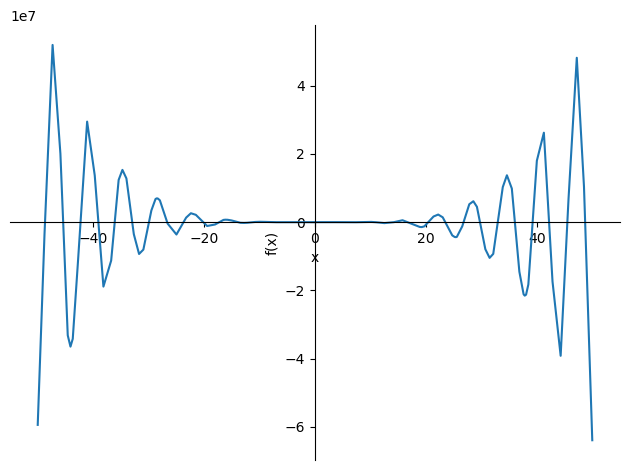

In [6]:
from sympy.plotting import plot
plot(f, (x, -50, 50))

In [7]:
print('Вершины и низины:\n', *[('x:'+str(e['x']), 'f:' + str(e['f'])) for e in extremums], sep='\n')

Вершины и низины:

('x:-47.2256484817221', 'f:51965417.3917112')
('x:-44.1199370667845', 'f:-36472120.4544392')
('x:-40.9470735375890', 'f:29526756.9705978')
('x:-37.8313985972732', 'f:-19585603.0827292')
('x:-34.7701099588650', 'f:15303833.9927443')
('x:-31.6407957980140', 'f:-9379044.81523089')
('x:-28.4957796720679', 'f:6971858.35930036')
('x:-25.3466461586162', 'f:-3809649.46040443')
('x:-22.2261972964361', 'f:2619650.03321970')
('x:-19.1455941359425', 'f:-1189637.26151163')
('x:-16.0665525069077', 'f:719768.904596312')
('x:-12.9280559916623', 'f:-230198.503491012')
('x:-9.9337690610358', 'f:107565.823617025')
('x:-6.85062228513275', 'f:-13815.6168035180')
('x:-4.12686592820621', 'f:3106.12673740818')
('x:1.66103336072289', 'f:-73.8651267078111')
('x:3.77305684575625', 'f:868.742609444956')
('x:6.98352369796896', 'f:-25605.2595635028')
('x:9.83516413341352', 'f:72552.0295914994')
('x:13.0606499895942', 'f:-308338.756647110')
('x:16.0405848102516', 'f:571107.225771733')
('x:19.19284

In [8]:
print(*[(str(r[0]), str(r[1])) for r in f_positive_ranges], sep='\n')

('-48.7256484817221', '-45.5199370667845')
('-42.4470735375890', '-39.2313985972732')
('-36.1701099588650', '-32.9407957980140')
('-29.8957796720679', '-26.6466461586162')
('-23.6261972964361', '-20.3455941359425')
('-17.3665525069077', '-14.0280559916623')
('-11.1337690610358', '-7.65062228513275')
('-5.02686592820621', '-1.33896663927711')
('2.27305684575625', '4.38352369796896')
('8.03516413341352', '10.8606499895942')
('14.2405848102516', '17.1928480700451')
('20.4926000632169', '23.4988388764551')
('26.7590297922122', '29.7952429281633')
('33.0317612356933', '36.0870621935254')
('39.3078043212952', '42.3763314152199')
('45.5858013946050', '48.6640356793606')


In [9]:
print(*[(str(r[0]), str(r[1])) for r in f_negative_ranges], sep='\n')

('-45.5199370667845', '-42.4470735375890')
('-39.2313985972732', '-36.1701099588650')
('-32.9407957980140', '-29.8957796720679')
('-26.6466461586162', '-23.6261972964361')
('-20.3455941359425', '-17.3665525069077')
('-14.0280559916623', '-11.1337690610358')
('-7.65062228513275', '-5.02686592820621')
('-1.33896663927711', '2.27305684575625')
('4.38352369796896', '8.03516413341352')
('10.8606499895942', '14.2405848102516')
('17.1928480700451', '20.4926000632169')
('23.4988388764551', '26.7590297922122')
('29.7952429281633', '33.0317612356933')
('36.0870621935254', '39.3078043212952')
('42.3763314152199', '45.5858013946050')
('48.6640356793606', '49.1396400840685')
('49.1396400840685', '51.8650474071078')
